<H1>AUTISM IDENTIFICATION SYSTEM</H1>

<H2>1. Import necessary libraies</H2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
pd.set_option('display.max_columns', None)

<h2>2. Define Dataframe from csv file</h2>

In [2]:
file_path = "Data.csv"
df = pd.read_csv(file_path, engine='python') #Implementation of 'engine'=python, we can able to analysis the larger dataset
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2,18 and more,?,NO


<h2>3. Dataset Information</h2>

In [3]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


<h2>4. Remove Null values and outliers</h2>

In [4]:
pd.DataFrame(df.isnull().sum(),columns=['Missing values'])

,Missing values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


Here , We can able to see that at column "AGE" has two missing values

<Axes: >

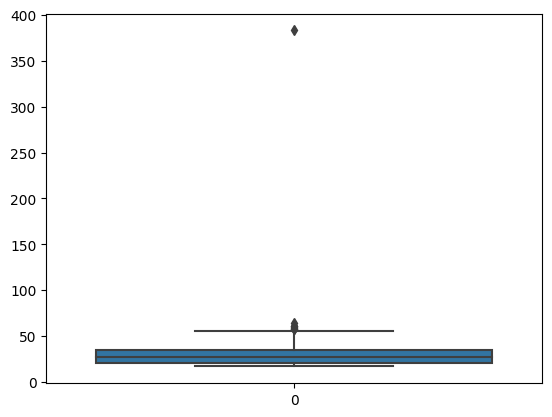

In [5]:
sns.boxplot([df.age])

In [6]:
df[df['age']==df['age'].max()]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,383.0,f,Pasifika,no,no,New Zealand,no,1,18 and more,Self,NO


In [7]:
if 52 in df.index:
    # Drop the row with index 52
    df.drop(index=52, inplace=True)
    
    # Reset the index
    df.reset_index(drop=True, inplace=True)
else:
    print("Index '52' does not exist in the DataFrame.")

In [8]:
df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))

In [9]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])

,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         703 non-null    int64  
 1   A2_Score         703 non-null    int64  
 2   A3_Score         703 non-null    int64  
 3   A4_Score         703 non-null    int64  
 4   A5_Score         703 non-null    int64  
 5   A6_Score         703 non-null    int64  
 6   A7_Score         703 non-null    int64  
 7   A8_Score         703 non-null    int64  
 8   A9_Score         703 non-null    int64  
 9   A10_Score        703 non-null    int64  
 10  age              703 non-null    float64
 11  gender           703 non-null    object 
 12  ethnicity        703 non-null    object 
 13  jundice          703 non-null    object 
 14  austim           703 non-null    object 
 15  contry_of_res    703 non-null    object 
 16  used_app_before  703 non-null    object 
 17  result          

<h2>5. Replace the invalid values</h2>

In [11]:
for col in df.select_dtypes('object').columns:
    print(f'column names :- {col}\n')
    print(f'Unique values: \n {df[col].unique()} \n')
    print('-----------------------------------------------------------------------')

column names :- gender

Unique values: 
 ['f' 'm'] 

-----------------------------------------------------------------------
column names :- ethnicity

Unique values: 
 ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others'] 

-----------------------------------------------------------------------
column names :- jundice

Unique values: 
 ['no' 'yes'] 

-----------------------------------------------------------------------
column names :- austim

Unique values: 
 ['no' 'yes'] 

-----------------------------------------------------------------------
column names :- contry_of_res

Unique values: 
 ['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Swe

Replace the Relation with '?' values as maximum frequency mode

In [12]:
df['relation'] = df['relation'].replace('?',df['relation'].mode()[0])
df['relation'].unique()

array(['Self', 'Parent', 'Health care professional', 'Relative', 'Others'],
      dtype=object)

Replace the ethnicity values with others value

In [13]:
df['ethnicity'] = df['ethnicity'].replace('?','Others')
df['ethnicity'] = df['ethnicity'].replace('others','Others')
df['ethnicity'].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish'], dtype=object)

<h2>6. Visualization</h2>

Text(0, 0.5, 'No. of peoples')

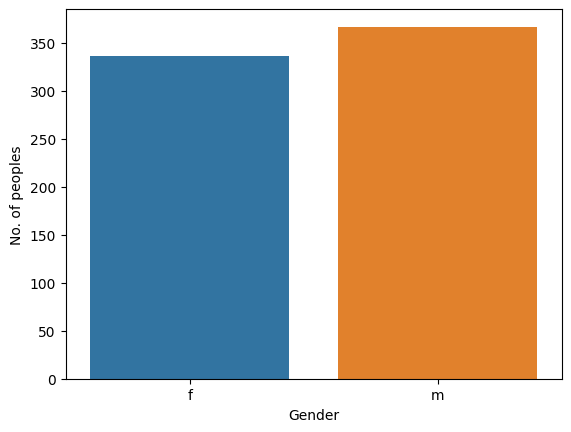

In [14]:
sns.countplot(data=df,x='gender')
plt.xlabel('Gender')
plt.ylabel('No. of peoples')

Text(0.5, 1.0, 'No. of People accepted they have Autism condition')

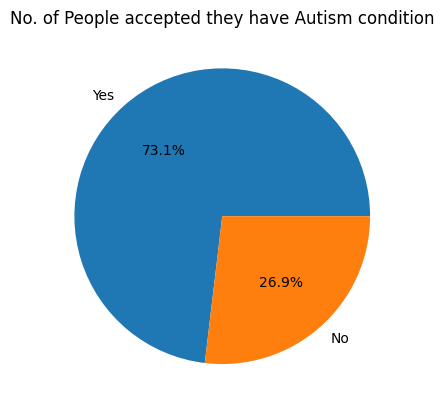

In [15]:
df_gender = df['Class/ASD'].value_counts()
plt.pie(df_gender,labels=['Yes','No'],autopct='%1.1f%%')
plt.title('No. of People accepted they have Autism condition')

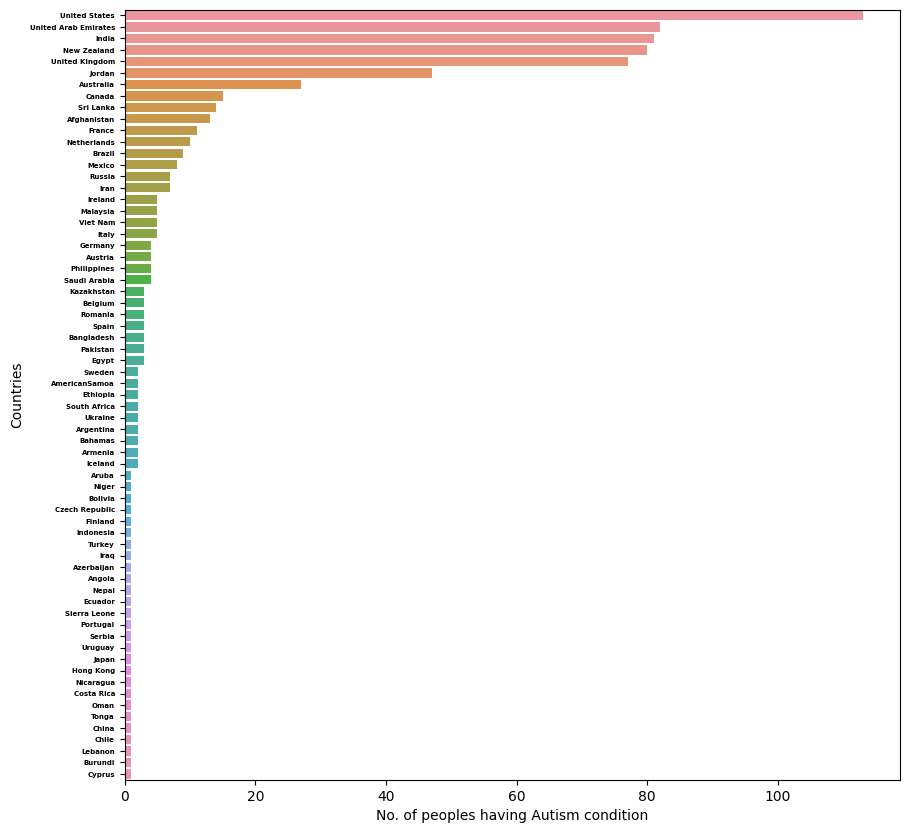

In [16]:
df_country = df['contry_of_res'].value_counts()
d = dict(df_country)
coun = []
ind = []
for i,j in d.items():
    coun.append(i)
    ind.append(j)

plt.figure(figsize=(10,10))
ax = sns.barplot(x=ind,y=coun)
ax.set_yticklabels(coun,fontsize = 5,fontweight='bold')
plt.xlabel('No. of peoples having Autism condition')
plt.ylabel('Countries')
plt.show()

<h2>7. Pre-processing Data for Classification</h2>

In [17]:
df.drop(['age_desc','used_app_before'], axis=1, inplace=True)

In [18]:
x = df.drop(['Class/ASD'],axis=1)
y = df['Class/ASD']

In [19]:
x.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,6,Self
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,5,Self
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,8,Parent
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,6,Self
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Others,no,no,Egypt,2,Self


In [20]:
X = pd.get_dummies(x)
Y = y.replace({"YES": int(1), "NO": int(0)})

In [21]:
X.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result',
       'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black',
       'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ',
       'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian',
       'ethnicity_Turkish', 'ethnicity_White-European', 'jundice_no',
       'jundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan',
       'contry_of_res_AmericanSamoa', 'contry_of_res_Angola',
       'contry_of_res_Argentina', 'contry_of_res_Armenia',
       'contry_of_res_Aruba', 'contry_of_res_Australia',
       'contry_of_res_Austria', 'contry_of_res_Azerbaijan',
       'contry_of_res_Bahamas', 'contry_of_res_Bangladesh',
       'contry_of_res_Belgium', 'contry_of_res_Bolivia',
       'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada',
       'contry_of_res_Chile', 'contry_of_res

In [22]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: Class/ASD, dtype: int64

In [23]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X,Y,test_size=0.25, random_state=42)

In [24]:
X_train1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,gender_f,gender_m,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Middle Eastern,ethnicity_Others,ethnicity_Pasifika,ethnicity_South Asian,ethnicity_Turkish,ethnicity_White-European,jundice_no,jundice_yes,austim_no,austim_yes,contry_of_res_Afghanistan,contry_of_res_AmericanSamoa,contry_of_res_Angola,contry_of_res_Argentina,contry_of_res_Armenia,contry_of_res_Aruba,contry_of_res_Australia,contry_of_res_Austria,contry_of_res_Azerbaijan,contry_of_res_Bahamas,contry_of_res_Bangladesh,contry_of_res_Belgium,contry_of_res_Bolivia,contry_of_res_Brazil,contry_of_res_Burundi,contry_of_res_Canada,contry_of_res_Chile,contry_of_res_China,contry_of_res_Costa Rica,contry_of_res_Cyprus,contry_of_res_Czech Republic,contry_of_res_Ecuador,contry_of_res_Egypt,contry_of_res_Ethiopia,contry_of_res_Finland,contry_of_res_France,contry_of_res_Germany,contry_of_res_Hong Kong,contry_of_res_Iceland,contry_of_res_India,contry_of_res_Indonesia,contry_of_res_Iran,contry_of_res_Iraq,contry_of_res_Ireland,contry_of_res_Italy,contry_of_res_Japan,contry_of_res_Jordan,contry_of_res_Kazakhstan,contry_of_res_Lebanon,contry_of_res_Malaysia,contry_of_res_Mexico,contry_of_res_Nepal,contry_of_res_Netherlands,contry_of_res_New Zealand,contry_of_res_Nicaragua,contry_of_res_Niger,contry_of_res_Oman,contry_of_res_Pakistan,contry_of_res_Philippines,contry_of_res_Portugal,contry_of_res_Romania,contry_of_res_Russia,contry_of_res_Saudi Arabia,contry_of_res_Serbia,contry_of_res_Sierra Leone,contry_of_res_South Africa,contry_of_res_Spain,contry_of_res_Sri Lanka,contry_of_res_Sweden,contry_of_res_Tonga,contry_of_res_Turkey,contry_of_res_Ukraine,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
176,0,0,1,1,1,0,0,1,1,1,29.0,6,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
223,1,1,1,1,1,1,1,0,1,1,21.0,9,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
213,1,1,1,1,0,0,0,0,0,1,42.0,5,False,True,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
239,1,0,0,1,1,0,1,1,0,0,21.0,5,False,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [25]:
print("Dataset with testsize of 25%")
print(f"Shape of X Training dataset = {np.shape(X_train1)}")
print(f"Shape of Y Training dataset = {np.shape(Y_train1)}")
print(f"Shape of X Testing dataset = {np.shape(X_test1)}")
print(f"Shape of Y Testing dataset = {np.shape(Y_test1)}\n")

Dataset with testsize of 25%
Shape of X Training dataset = (527, 100)
Shape of Y Training dataset = (527,)
Shape of X Testing dataset = (176, 100)
Shape of Y Testing dataset = (176,)



In [26]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

<h2>8. Logistic Regresseion</h2>

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       120
           1       0.96      0.89      0.93        56

    accuracy                           0.95       176
   macro avg       0.96      0.94      0.95       176
weighted avg       0.95      0.95      0.95       176

Mean squared error of logistic regression = 0.045454545454545456
R-squared = 0.7904761904761906



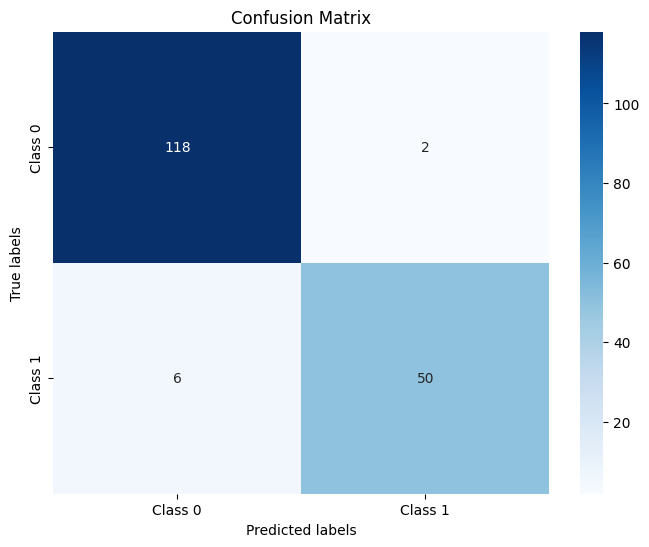

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm

pipeline1 = Pipeline([
    ('scaler',StandardScaler()),
    ('model',lm.LogisticRegression())])

log1 = pipeline1.fit(X_train1,Y_train1)

prediction_log = pipeline1.predict(X_test1)
print(classification_report(Y_test1, prediction_log))

mse_log1 = mean_squared_error(Y_test1, prediction_log)
r2_log1 = r2_score(Y_test1, prediction_log)

print(f"Mean squared error of logistic regression = {mse_log1}")
print(f"R-squared = {r2_log1}\n")

plot_confusion_matrix(Y_test1, prediction_log, classes=['Class 0', 'Class 1'])

<h2>9. Support Vector Machine</h2>

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       120
           1       1.00      0.98      0.99        56

    accuracy                           0.99       176
   macro avg       1.00      0.99      0.99       176
weighted avg       0.99      0.99      0.99       176

Mean squared error of SVC = 0.005681818181818182
R-squared = 0.9738095238095238



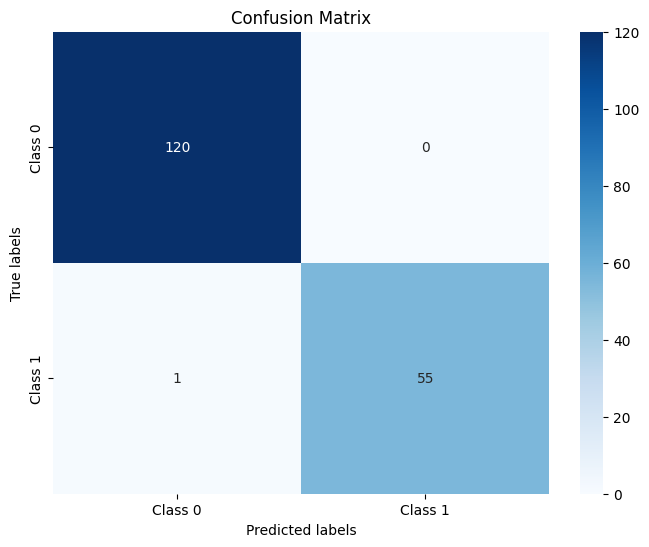

In [28]:
from sklearn.svm import SVC
model_svm = SVC(C=100, gamma=0.01)
model_svm.fit(X_train1, Y_train1)
prediction_svm = model_svm.predict(X_test1)

print(classification_report(Y_test1, prediction_svm))
mse_svm = mean_squared_error(Y_test1, prediction_svm)
r2_svm = r2_score(Y_test1, prediction_svm)

print(f"Mean squared error of SVC = {mse_svm}")
print(f"R-squared = {r2_svm}\n")

plot_confusion_matrix(Y_test1, prediction_svm, classes=['Class 0', 'Class 1'])

<h2>10. Random Forest Classification</h2>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        56

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176

Mean squared error of Random Forest = 0.0
R-squared = 1.0



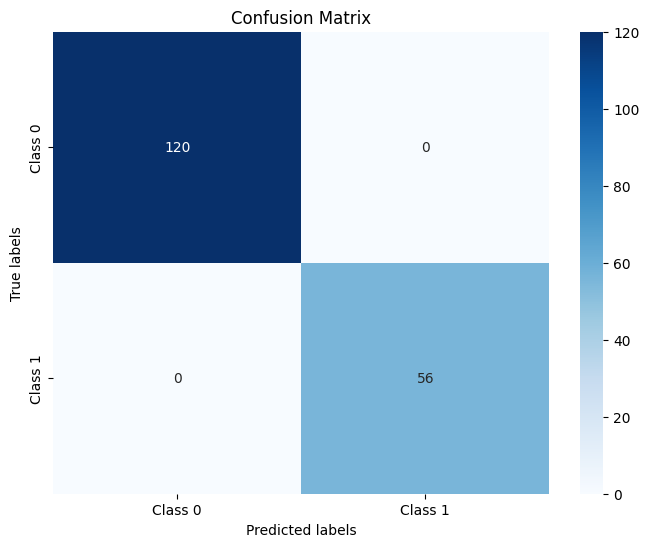

In [29]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
model_rfc.fit(X_train1, Y_train1)
prediction_rfc = model_rfc.predict(X_test1)

print(classification_report(Y_test1, prediction_rfc))
mse_rfc = mean_squared_error(Y_test1, prediction_rfc)
r2_rfc = r2_score(Y_test1, prediction_rfc)

print(f"Mean squared error of Random Forest = {mse_rfc}")
print(f"R-squared = {r2_rfc}\n")

plot_confusion_matrix(Y_test1, prediction_rfc, classes=['Class 0', 'Class 1'])

<h2>11. Results</h2>

<h2>From above observation we found that model accuracy across the different splits highlight the critical role of data splitting strategies in enhancing predictive performance and capturing the underlying patterns in the data.
Model 3, with the lowest mean squared error and highest R-squared value have more refined subsets of data lead to better model performance, emphasizing the significance of data preprocessing and feature selection in predictive modeling.</h2>